In [66]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.linalg  import cholesky, solve_triangular
from scipy.special import logsumexp

In [28]:
def random_choice(X):
    arr = range(len(X))
    idx = np.random.choice(arr)
    return X[idx]

In [178]:
def compute_prec_chol(cov):
    _, p = np.array(cov).shape
    cov_chol = cholesky(cov, lower=True)
    return solve_triangular(cov_chol, np.eye(p), lower=True).T

In [179]:
def compute_mahalanobis(X, mu, prc_chol):
    y = np.dot(X, prc_chol) - np.dot(mu, prc_chol)
    return np.sum(np.square(y), axis=1).reshape(-1, 1)

In [195]:
np.random.seed(0)

In [196]:
X1 = np.c_[np.random.randn(200), np.random.randn(200)]
X2 = np.c_[np.random.randn(200)*.5 + 1, np.random.randn(200)*.5 + 1]
X  = np.r_[X1, X2]
X[:5]

array([[ 1.76405235, -0.36918184],
       [ 0.40015721, -0.23937918],
       [ 0.97873798,  1.0996596 ],
       [ 2.2408932 ,  0.65526373],
       [ 1.86755799,  0.64013153]])

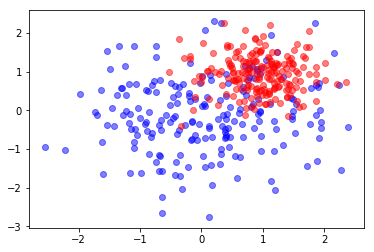

In [197]:
plt.scatter(X1[:,0], X1[:,1], alpha=.5, c='b')
plt.scatter(X2[:,0], X2[:,1], alpha=.5, c='r')
plt.show()

In [198]:
mu01  = random_choice(X)
cov01 = np.cov(X.T)

mu02  = random_choice(X)
cov02 = np.cov(X.T)

print 'initial guesses'
print 'mu01:  {0}\ncov01: {1}'.format(mu01, cov01)
print '\nmu02:  {0}\ncov02: {1}'.format(mu02, cov02)

initial guesses
mu01:  [ 0.95703462  1.51720494]
cov01: [[ 0.84827923  0.26456369]
 [ 0.26456369  0.84797968]]

mu02:  [ 0.97663904 -1.06001582]
cov02: [[ 0.84827923  0.26456369]
 [ 0.26456369  0.84797968]]


In [199]:
tau = np.random.rand(*X.shape)
tau = tau / tau.sum(1)[:, np.newaxis]
tau[:5]

array([[ 0.52945557,  0.47054443],
       [ 0.28827001,  0.71172999],
       [ 0.51075656,  0.48924344],
       [ 0.82684324,  0.17315676],
       [ 0.68782731,  0.31217269]])

In [456]:
_, p = X.shape
# e-step

prc_chol = compute_prec_chol(cov01)
log_det  = np.log(prc_chol.reshape(1, -1)[:,::p+1]).sum()
mahalanobis = compute_mahalanobis(X, mu01, prc_chol)

tau01 = -p*.5*np.log(2 * np.pi) + log_det -.5*mahalanobis

prc_chol = compute_prec_chol(cov02)
log_det  = np.log(prc_chol.reshape(1, -1)[:,::p+1]).sum()
mahalanobis = compute_mahalanobis(X, mu02, prc_chol)

tau02 = -p*.5*np.log(2 * np.pi) + log_det -.5*mahalanobis

tau = np.c_[tau01, tau02] + np.log(tau.sum(axis=0))

log_resp = tau - logsumexp(tau, axis=1)[:, np.newaxis]

tau  = np.exp(log_resp)
mu01 = np.dot(tau[:,0], X) / np.sum(tau, 0)[:, np.newaxis][0]
mu02 = np.dot(tau[:,1], X) / np.sum(tau, 0)[:, np.newaxis][1]

diff = X - mu01
cov01 = np.dot(tau[:, 0] * diff.T, diff) / np.sum(tau, 0)[:, np.newaxis][0]

diff = X - mu02
cov02 = np.dot(tau[:, 1] * diff.T, diff) / np.sum(tau, 0)[:, np.newaxis][1]

print 'mu01:  {0}\ncov01: {1}'.format(mu01, cov01)
print '\nmu02:  {0}\ncov02: {1}'.format(mu02, cov02)

mu01:  [ 1.03784318  0.90709223]
cov01: [[ 0.23218966 -0.03665479]
 [-0.03665479  0.27867941]]

mu02:  [-0.0650233  -0.14179665]
cov02: [[ 0.87887505 -0.01201526]
 [-0.01201526  0.88828083]]
